Zad1

In [7]:
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
# Wczytanie danych CIFAR-10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
# Normalizacja danych
x_train = x_train / 255.0
x_test = x_test / 255.0
# Definicja modelu CNN
model = Sequential([
 Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
 MaxPooling2D((2, 2)),
 Conv2D(64, (3, 3), activation='relu'),MaxPooling2D((2, 2)),
 Conv2D(64, (3, 3), activation='relu'),
 Flatten(),
 Dense(64, activation='relu'),
 Dense(10, activation='softmax')
])
# Kompilacja modelu
model.compile(optimizer='adam',
 loss='sparse_categorical_crossentropy',
 metrics=['accuracy'])
# Trenowanie modelu
model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))
# Ocena modelu
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Dokładność klasyfikacji:', test_acc)


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 25s 14ms/step - accuracy: 0.3352 - loss: 1.7877 - val_accuracy: 0.5176 - val_loss: 1.3112
Epoch 2/10
1037/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.5465 - loss: 1.2616

KeyboardInterrupt: 

Zad2

In [8]:
from keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

Zad3


In [9]:
from keras.utils import to_categorical

#normalizacja
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

#dodanie kanału
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

#one hot
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

Zad4

In [10]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28,1)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')

])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


Zad5/Zad6

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 24s 12ms/step - accuracy: 0.7055 - loss: 0.8008 - val_accuracy: 0.8447 - val_loss: 0.4269
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - accuracy: 0.8514 - loss: 0.4025 - val_accuracy: 0.8632 - val_loss: 0.3736
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.8741 - loss: 0.3430 - val_accuracy: 0.8674 - val_loss: 0.3576
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.8885 - loss: 0.3005 - val_accuracy: 0.8828 - val_loss: 0.3295
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.8999 - loss: 0.2704 - val_accuracy: 0.8825 - val_loss: 0.3190
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.9076 - loss: 0.2477 - val_accuracy: 0.8880 - val_loss: 0.3160
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.9124 - loss: 0.2333 - val_accuracy: 0.8947 - val_loss: 0.2986
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.9198 -

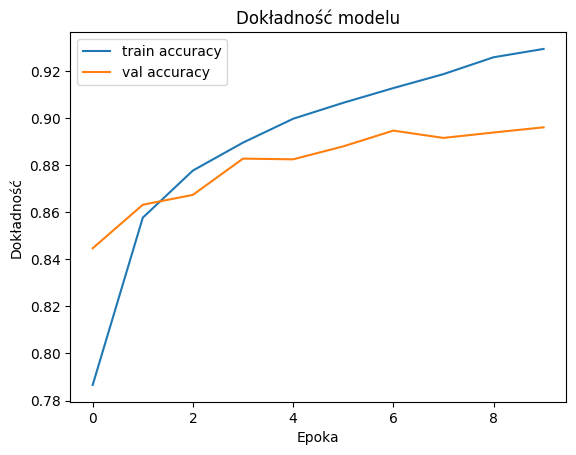

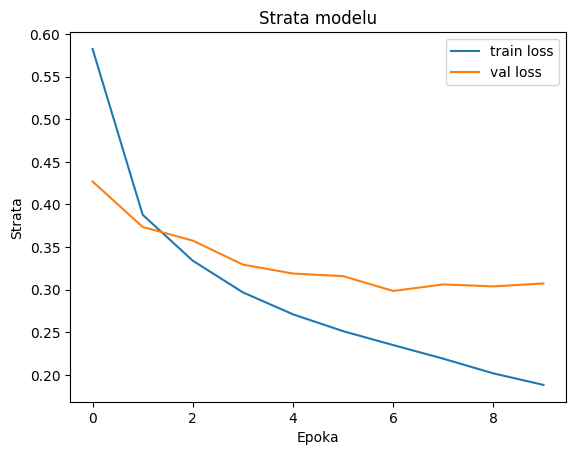

In [11]:
import matplotlib.pyplot as plt

history = model.fit(x_train, y_train, 
          epochs=10, 
          validation_data=(x_test, y_test))

test_loss, test_acc = model.evaluate(x_test, y_test)
print("Dokładność na zbiorze testowym:", test_acc)

plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Dokładność modelu')
plt.xlabel('Epoka')
plt.ylabel('Dokładność')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Strata modelu')
plt.xlabel('Epoka')
plt.ylabel('Strata')
plt.legend()
plt.show()

Zad7

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


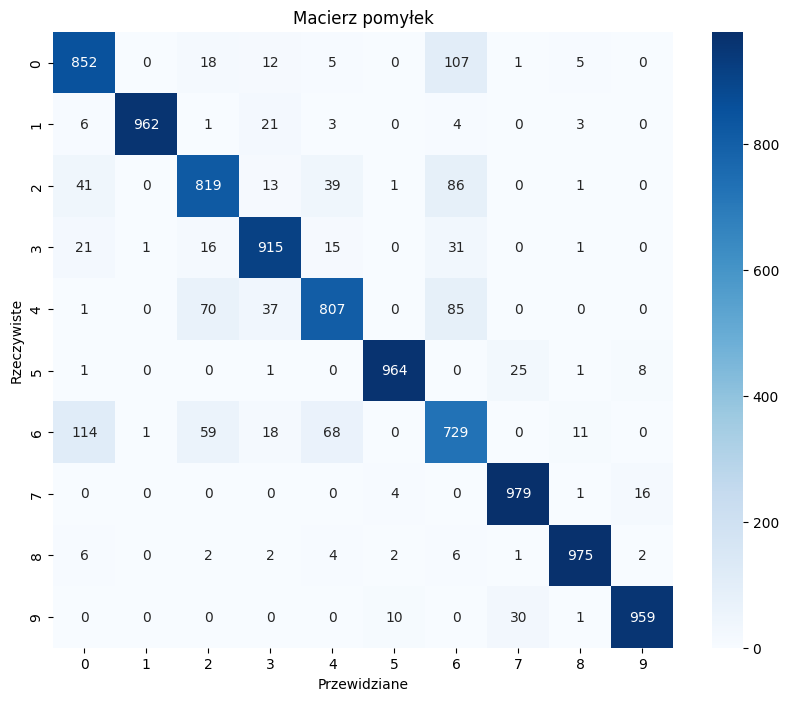

In [12]:
import numpy as np
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)  
y_true = np.argmax(y_test, axis=1)


from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Macierz pomyłek')
plt.xlabel('Przewidziane')
plt.ylabel('Rzeczywiste')
plt.show()



In [13]:
from sklearn.metrics import classification_report
print(classification_report(y_true, y_pred_classes))

              precision    recall  f1-score   support

           0       0.82      0.85      0.83      1000
           1       1.00      0.96      0.98      1000
           2       0.83      0.82      0.83      1000
           3       0.90      0.92      0.91      1000
           4       0.86      0.81      0.83      1000
           5       0.98      0.96      0.97      1000
           6       0.70      0.73      0.71      1000
           7       0.94      0.98      0.96      1000
           8       0.98      0.97      0.98      1000
           9       0.97      0.96      0.97      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000

